In [157]:
import batman # sudo pip3 install batman-package
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [158]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)

time_between_measurements = 30 / 24*60 # days
total_time = 31 # days
total_measurements = total_time_minutes / time_between_measurements

In [159]:
def plt_curves(noise_type, noise_function):
    ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
    ld_coefficients = [[], [0.3], [0.1, 0.3], [0.5, 0.1, 0.1, -0.1]]
    n = len(ld_options)

    plt.figure()

    for i in range(n):

        t = np.linspace(-0.05, 0.05, 100)

        params.limb_dark = ld_options[i]          #specifies the LD profile
        params.u = ld_coefficients[i]             #updates LD coefficients
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve


        plt.plot(t, flux, label = ld_options[i], color='r')


        plt.scatter(t, noise_function(flux))
        plt.title("Fake lightcurve using {} limb darkening and {} noise".format(ld_options[i], noise_type))
        plt.xlabel("Time from central transit")
        plt.ylabel("Relative flux")


        plt.show()

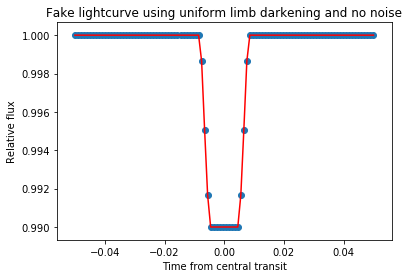

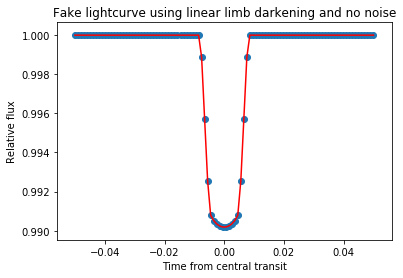

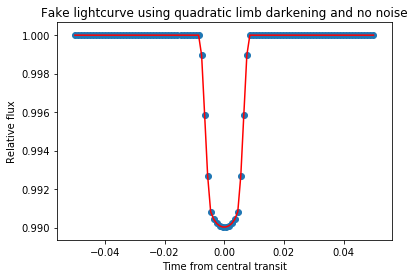

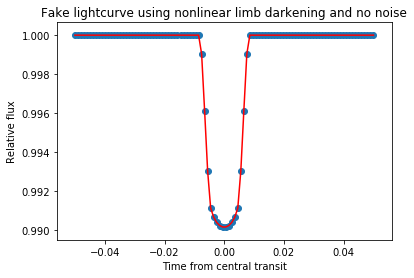

In [160]:
no_noise = lambda x: x
plt_curves("no", no_noise)

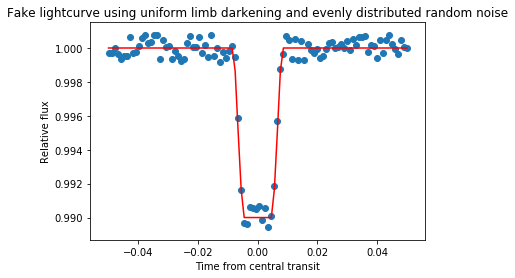

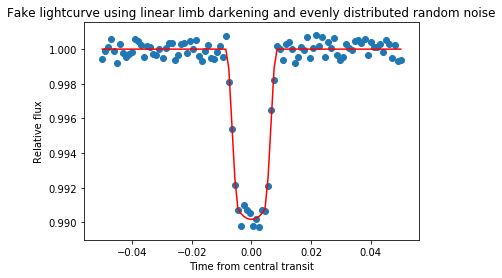

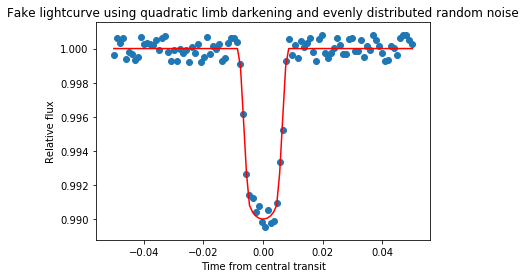

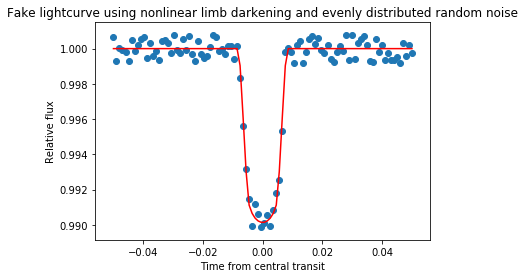

In [161]:
random_noise = lambda x: [f - (rand()-0.5)/600.0 for f in x]
plt_curves("evenly distributed random", random_noise)

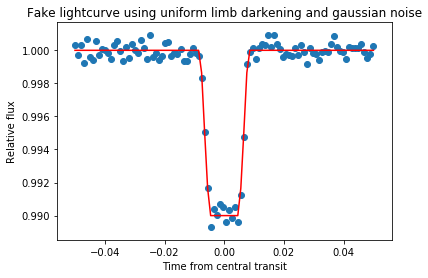

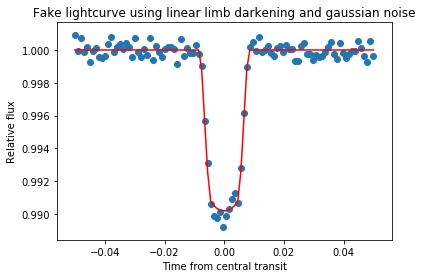

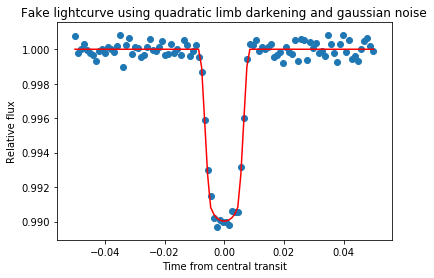

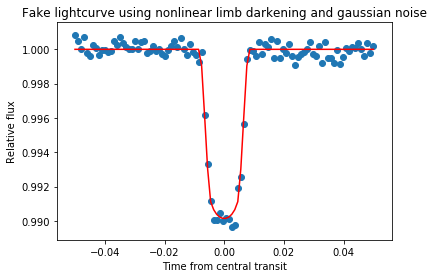

In [163]:
gaussian_noise = lambda x: [f - np.random.normal(0,0.0004) for f in x]
plt_curves("gaussian", gaussian_noise)